# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Zefanya Danovanta Tarigan
- **Email:** @zefanyadanovantaa@gmail.com
- **ID Dicoding:** B244003E

## Menentukan Pertanyaan Bisnis

- Bagaimana penyewaan sepeda pada hari libur dan hari kerja di tiap tahunnya?
- Pada jam berapa penyewaan sepeda paling tinggi ?
- Berapa banyak penyewaan pada tiap musimnya ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage


## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Mengambil data day.csv ke variabel "day_df"
- Mengambil data hour.csv ke variabel "hour_df"

### Assessing Data

#### Menilai tabel `day_df`

In [4]:
day_df.info()
day_df.isna().sum()
day_df.duplicated().sum()
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

In [5]:
hour_df.info()
hour_df.isna().sum()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Mengidentifikasi kesalahan data pada tabel hour_df
- Mengidentifikasi kesalahan data pada tabel day_df

### Cleaning Data

#### Membersihkan tabel `day_df`

##### Memperbaiki tipe data

In [6]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Membersihkan tabel `hour_df`

##### Memperbaiki tipe data

In [7]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Mengubah tipe data di tabel day_df pada variabel dteday menjadi tipe data datetime
- Mengubah tipe data di tabel hour_df pada variabel dteday menjadi tipe data datetime


## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [8]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
243,244,2011-09-01,3,0,9,0,4,1,1,0.655000,0.614921,0.639167,0.141796,783,4332,5115
724,725,2012-12-25,1,1,12,1,2,0,2,0.291304,0.294465,0.734783,0.168726,440,573,1013
566,567,2012-07-20,3,1,7,0,5,1,2,0.665833,0.613025,0.844167,0.208967,747,5123,5870
505,506,2012-05-20,2,1,5,0,0,0,1,0.620833,0.583967,0.530417,0.254367,2704,4425,7129
499,500,2012-05-14,2,1,5,0,1,1,2,0.573333,0.549900,0.789583,0.212692,342,2501,2843


In [9]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [10]:
day_df['Day_type'] = day_df['workingday'].map({1: 'Hari Kerja', 0: 'Hari Libur'})
day_df['year'] = day_df['dteday'].dt.year
day_type_year_summary = day_df.groupby(['year', 'Day_type'])['cnt'].mean().reset_index()

### Explore `hour_df`

In [11]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16659,16660,2012-12-01,4,1,12,22,0,6,0,2,0.30,0.3333,0.87,0.0000,17,130,147
11482,11483,2012-04-28,2,1,4,15,0,6,0,1,0.42,0.4242,0.41,0.2239,148,260,408
14220,14221,2012-08-20,3,1,8,17,0,1,1,1,0.70,0.6515,0.58,0.2836,83,810,893
17027,17028,2012-12-17,4,1,12,6,0,1,1,2,0.36,0.3485,0.93,0.1343,1,107,108
11705,11706,2012-05-07,2,1,5,22,0,1,1,2,0.54,0.5152,0.45,0.2537,26,147,173


In [12]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [13]:
hourly_counts = hour_df.groupby('hr')['cnt'].mean()

In [14]:
season_summary = hour_df.groupby('season')['cnt'].sum().reset_index()

season_labels = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
    }

season_summary['season_label'] = season_summary['season'].map(season_labels)

**Insight:**
- Melakukan eksplorasi terhadap tabel day_df untuk menjawab pertanyaan yang di analisis
- Melakukan eksplorasi terhadap tabel hour_df untuk menjawab pertanyaan yang di analisis

## Visualization & Explanatory Analysis

### Pertanyaan 1:

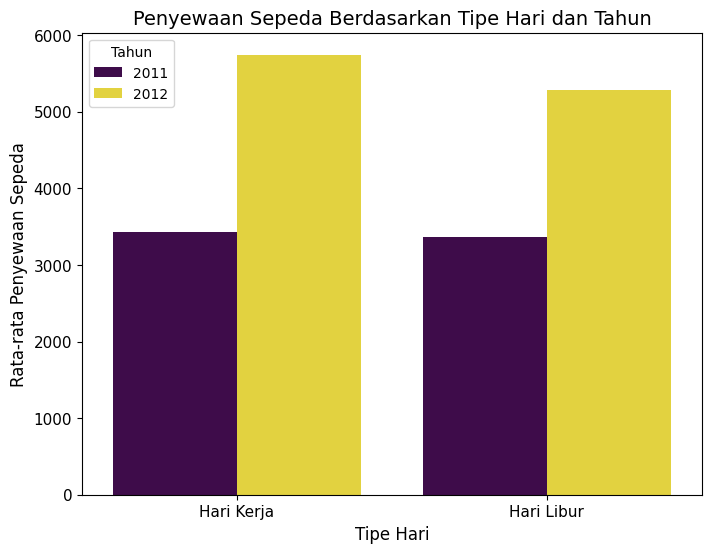

In [15]:
plt.figure(figsize=(8, 6))

sns.barplot(
    data=day_type_year_summary,
    x="Day_type",
    y="cnt",
    hue="year",
    palette="viridis"
   )

plt.title("Penyewaan Sepeda Berdasarkan Tipe Hari dan Tahun", fontsize=14)
plt.xlabel("Tipe Hari", fontsize=12)
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.legend(title="Tahun")
plt.show()

### Pertanyaan 2:

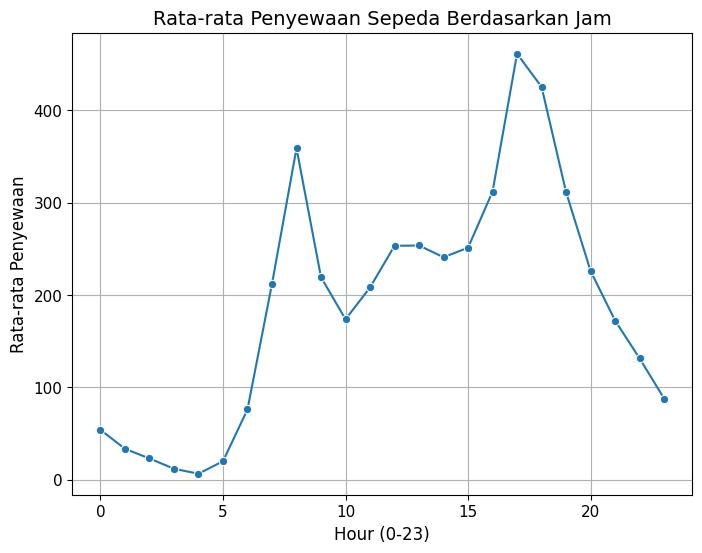

In [16]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker = "o")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Jam",fontsize = 14)
plt.xlabel("Hour (0-23)", fontsize= 12)
plt.ylabel("Rata-rata Penyewaan", fontsize = 12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True)
plt.show()

### Pertanyaan 3:

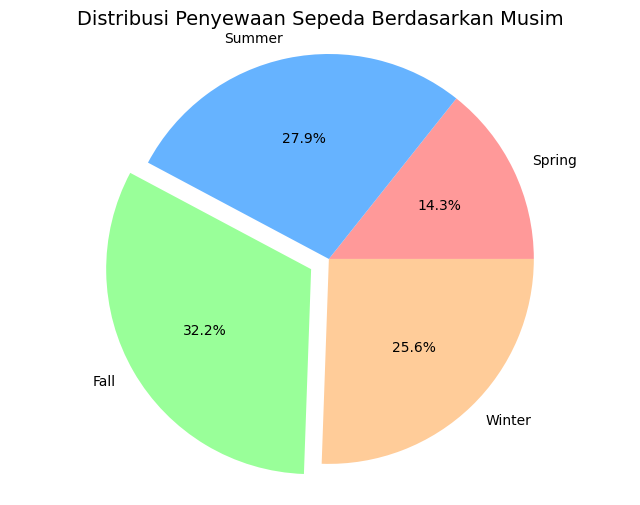

In [17]:
explode = (0, 0, 0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(
    season_summary['cnt'],
    labels=season_summary['season_label'],
    autopct='%1.1f%%',
    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],
    explode =explode
    )
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Musim', fontsize=14)
plt.axis('equal')
plt.show()

**Insight:**
- Membuat visualisasi berbentuk beberapa diagram dari pertanyaan yang di analisis
- Mmeberikan keterangan pada diagram tersebut agar dapat dimengerti oleh client terhadap analisis

## Analisis Lanjutan

### Analisis RFM

In [18]:
all_df = pd.concat([hour_df, day_df], ignore_index=True)
all_df.to_csv("dashboard/all.csv", index=False)

In [19]:
all_df['dteday'] = pd.to_datetime(all_df['dteday'])

In [20]:
user_rfm = all_df.groupby('registered').agg(
    recency=('dteday', 'max'),
    frequency=('dteday', 'count'),
    monetary=('cnt', 'sum')
).reset_index()

In [21]:
user_rfm['recency'] = (user_rfm['recency'].max() - user_rfm['recency']).dt.days

### Visualisasi Hasil RFM

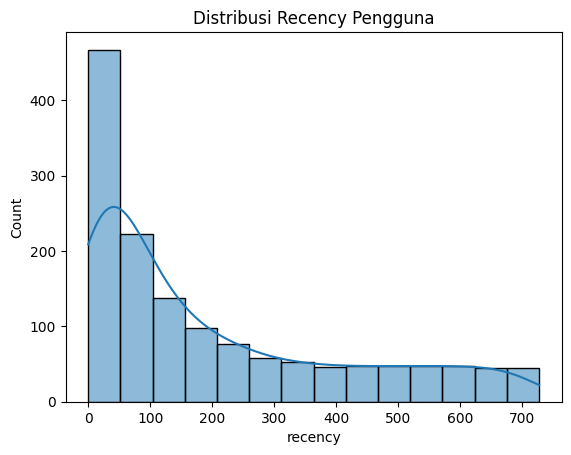

In [22]:
#Recency
sns.histplot(user_rfm["recency"], kde = True)
plt.title("Distribusi Recency Pengguna")
plt.show()

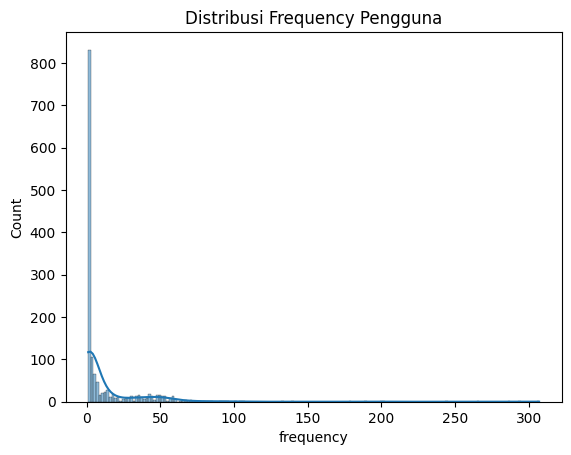

In [23]:
#Frequency
sns.histplot(user_rfm["frequency"], kde = True)
plt.title("Distribusi Frequency Pengguna")
plt.show()

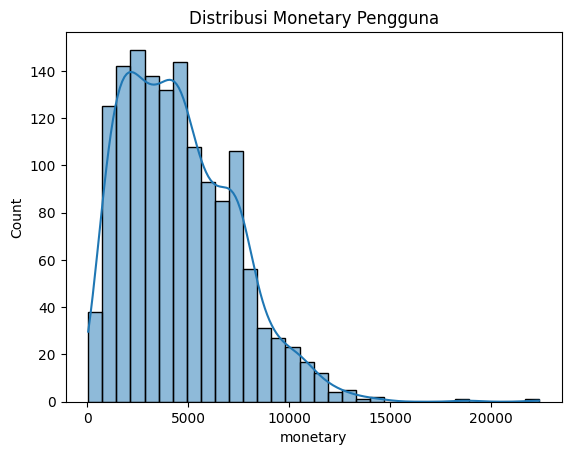

In [24]:
#Monetary
sns.histplot(user_rfm["monetary"], kde = True)
plt.title("Distribusi Monetary Pengguna")
plt.show()

### Geospatial Analysis

/var/folders/k2/q1y222d93tbd9z97csl3rg0r0000gn/T/ipykernel_30492/3176567594.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(weather_labels.values())


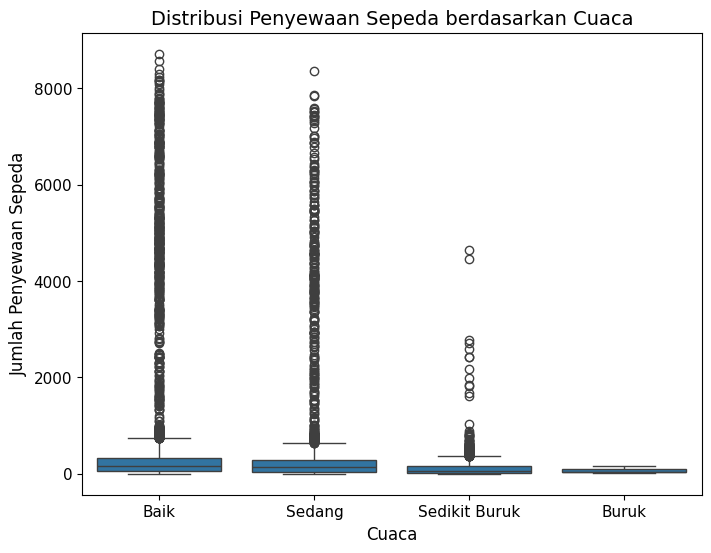

In [25]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=all_df, x='weathersit', y='cnt')

weather_labels = {
    1: 'Baik',
    2: 'Sedang',
    3: 'Sedikit Buruk',
    4: 'Buruk'
}
ax.set_xticklabels(weather_labels.values())

plt.title('Distribusi Penyewaan Sepeda berdasarkan Cuaca', fontsize = 14)
plt.xlabel('Cuaca', fontsize = 12)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize =12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

### Clustering Analysis

In [26]:
hourly_data = all_df.groupby('hr').agg(
    total_rentals=('cnt', 'sum')
).reset_index()

# Membuat linkage
Z = linkage(hourly_data[['hr', 'total_rentals']], 'ward')

### Visualisasi Clustering Analysis

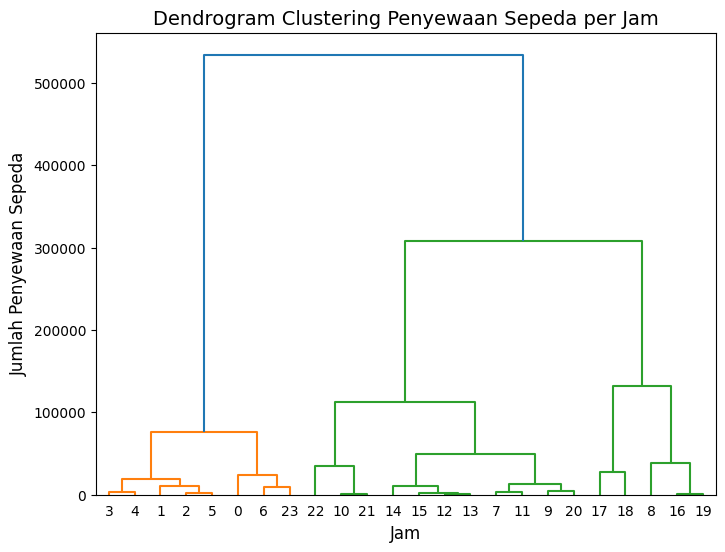

In [27]:
plt.figure(figsize=(8, 6))
dendrogram(Z)
plt.title('Dendrogram Clustering Penyewaan Sepeda per Jam', fontsize = 14)
plt.xlabel('Jam', fontsize =12)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize =12)
plt.xticks(rotation = 0)
plt.yticks()
plt.show()

## Conclusion

#### Konlusi pertanyaan 1 :
- Rata rata penyewaan sepeda pada tahun 2011, cenderung lebih sedikit di banding 2012, hal ini bisa disebabkan karna faktor cuaca. Peningkatan jumlah penyewaan pada hari kerja karena orang lebih cenderung menggunakan sepeda untuk berangkat kerja atau kegiatan rutin. Sementara itu, pada hari libur, jumlah penyewaan bisa jadi lebih rendah karena orang cenderung memilih aktivitas lain atau beristirahat.

#### Konlusi pertanyaan 2 :
- Penyewaan sepeda cenderung lebih tinggi pada jam-jam pagi hari dan sore hari , yang biasanya terkait jam-jam sibuk ketika orang berangkat dan pulang kerja. Sementara pada jam tengah hari, jumlah penyewaan biasanya menurun karena banyak orang sudah bekerja.

### Konlusi pertanyaan 3 :
- Tingginya penyewaan pada Fall dan Summer dipengaruhi oleh cuaca yang nyaman dan aktivitas rutin, sedangkan penyewaan pada Winter tetap signifikan karena pengguna rutin.